# HW05 <font color=red>(제출기한-5월21일자정)</font>
Datascience 모듈의 Table 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤, 코드 셀에 적절한 코드를 작성합니다.
- 작성 후 파일명에 ``학번``을 자신의 학번으로 고친 후 ULMS 해당과제 제출란에 업로드합니다.

In [ ]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### 수업시간에 사용하였던 다음 NBA 연봉 데이터를 이용합니다.

In [ ]:
nba = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


### 문제1
각 TEAM별 선수 수를 감소순으로 정렬하여 Table로 출력하시오. 

In [ ]:
### 답안을 작성하시오.
team = nba.group('TEAM')
team.sort('count',descending=True)

TEAM,count
Memphis Grizzlies,21
Charlotte Hornets,18
Washington Wizards,17
Utah Jazz,17
Toronto Raptors,17
Phoenix Suns,17
Oklahoma City Thunder,16
New Orleans Pelicans,16
Boston Celtics,15
Portland Trail Blazers,14


### 문제2
연봉이 가장 높은 200명 중 POSITION별 평균 연봉을 Table변수``top200``에 저장하시오. 

In [ ]:
### 답안을 작성하시오.
money200 = nba.sort('SALARY', descending=True).take(np.arange(200))
top200 = money200.select('POSITION', 'SALARY').group('POSITION', np.mean)

In [ ]:
### 지우지 마시오.
top200

POSITION,SALARY mean
C,9.07777
PF,8.1689
PG,9.12843
SF,10.2884
SG,8.10591


### 문제3
위와 같은 식으로 연봉이 가장 높은 100명 중 POSITION별 평균 연봉을 Table변수 top100에 저장하시오.  

In [ ]:
### 답안을 작성하시오.
money100 = nba.sort('SALARY', descending=True).take(np.arange(100))
top100 = money100.select('POSITION', 'SALARY').group('POSITION', np.mean)

In [ ]:
### 지우지 마시오.
top100

POSITION,SALARY mean
C,12.8281
PF,12.7646
PG,12.7541
SF,14.9192
SG,11.6078


### 문제4
위에서 구한 두 Table을 합쳐 Table 변수 top을 생성하시오. 이 때, column의 이름을 ``top100``, ``top200``으로 고치되 출력 순서도 ``top100``, ``top200``이 되도록 하시오. 

In [ ]:
### 답안을 작성하시오.
top = top100.join('POSITION',top200, 'POSITION')
top['top100'] = top['SALARY mean']
top['top200'] = top['SALARY mean_2']
top = top.drop('SALARY mean_2')
top = top.drop('SALARY mean')

In [ ]:
### 지우지 마시오.
top

POSITION,top100,top200
C,12.8281,9.07777
PF,12.7646,8.1689
PG,12.7541,9.12843
SF,14.9192,10.2884
SG,11.6078,8.10591


### 문제5
top100과 top200의 POSITION별 상대적 SALARY비중을 비교하기 위하여 top100과 top200 column 각각에 대하여 백분율(소수점 2번째자리에서 round-off)한 결과를 top에 추가하시오. 

In [ ]:
### 답안을 작성하시오.
def percents(counts):
    total = counts.sum()
    return np.round((counts/total)*100, 2)

percents(top['top100'])

top = top.with_columns(
    'top100 Percent',percents(top['top100']),
    'top200 Percent',percents(top['top200'])
)

In [ ]:
### 지우지 마시오.
top

POSITION,top100,top200,top100 Percent,top200 Percent
C,12.8281,9.07777,19.77,20.28
PF,12.7646,8.1689,19.68,18.25
PG,12.7541,9.12843,19.66,20.39
SF,14.9192,10.2884,23,22.98
SG,11.6078,8.10591,17.89,18.11


### 문제6
``top100 Percent``와 ``top200 Percent``에 대해서 수평 Bar 그래프를 그리시오. 


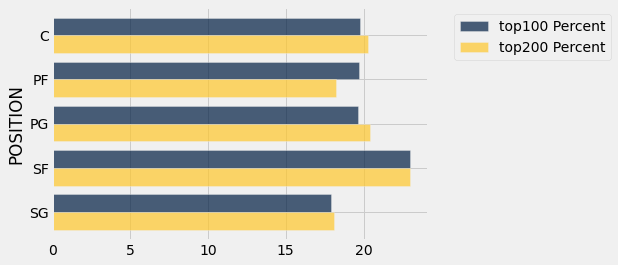

In [ ]:
### 답안을 작성하시오.
top.select(0, 3, 4).barh(0)

### 문제7
Table변수 ``nba``의 ``SALARY`` column에 대해서 histogram을 그리시오. (단, bins의 개수를 50으로 설정하시오)


(array([29., 44., 54., 24., 33., 25., 20., 18., 17., 11., 12., 12.,  9.,
         9.,  6.,  7.,  8.,  2.,  4.,  4.,  5.,  3.,  5.,  4.,  4.,  4.,
         5.,  4.,  2.,  2.,  4.,  6.,  4.,  1.,  1.,  0.,  0.,  2.,  0.,
         4.,  2.,  0.,  1.,  0.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([ 0.030888  ,  0.53027024,  1.02965248,  1.52903472,  2.02841696,
         2.5277992 ,  3.02718144,  3.52656368,  4.02594592,  4.52532816,
         5.0247104 ,  5.52409264,  6.02347488,  6.52285712,  7.02223936,
         7.5216216 ,  8.02100384,  8.52038608,  9.01976832,  9.51915056,
        10.0185328 , 10.51791504, 11.01729728, 11.51667952, 12.01606176,
        12.515444  , 13.01482624, 13.51420848, 14.01359072, 14.51297296,
        15.0123552 , 15.51173744, 16.01111968, 16.51050192, 17.00988416,
        17.5092664 , 18.00864864, 18.50803088, 19.00741312, 19.50679536,
        20.0061776 , 20.50555984, 21.00494208, 21.50432432, 22.00370656,
        22.5030888 , 23.00247104, 23.50185328, 24.00123552,

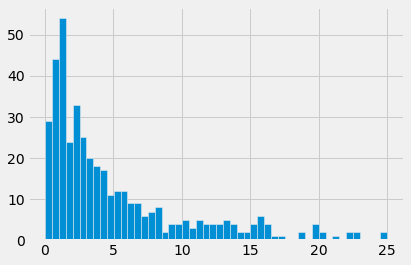

In [ ]:
### 답안을 작성하시오.
plots.hist(nba['SALARY'],bins=50)

### 문제 8
Position과 Salary를 입력받으면 nba Table에서  해당 Position의 Salary 중 몇 등에 해당하는지를 계산하는 함수 ``position_ranking``을 작성하시오. (함수 정의는 그대로 사용할 것)


In [ ]:
### 답안을 작성하시오.
def position_ranking(x,y,z):
  tmp1 = x.where('POSITION',y).sort('SALARY',descending=True)
  tmp2 = tmp1.select('POSITION', 'SALARY').where('SALARY', are.above(z)).group('POSITION')
  return tmp2[1][0]+1

In [ ]:
### 지우지 마시오.
position_ranking(nba, 'C', 15.0)

6